# Speech Classification by Audio Spectgram Transformer

* [Huggingface Audio Spectgram Transformer](https://huggingface.co/docs/transformers/model_doc/audio-spectrogram-transformer)

In [1]:
from IPython.display import (
    Audio, 
    display
)
import librosa
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchaudio
from transformers import ASTFeatureExtractor
from transformers import AutoModelForAudioClassification

In [13]:
PATH_TO_WAV: str = "../data/jfk.flac"
RESAMPLE_RATE: int = 16000

# Sound Data

In [14]:
# librosa.load resamples to 22050, unless sr parameter is set to None to preserve the original sampling.
data, sampling_rate = librosa.load(PATH_TO_WAV, sr=RESAMPLE_RATE)
print(f"data.shape: [{data.shape}]")
print(f"sampling rate: [{sampling_rate}]")   
print(f"duration [{data.shape[0] / sampling_rate}] secs") 
display(Audio(data=data, rate=sampling_rate))

data.shape: [(176000,)]
sampling rate: [16000]
duration [11.0] secs


# Sound Wave


# Audio Wave (Time Series)

Amplitude of the signal on the y-axis and time along the x-axis

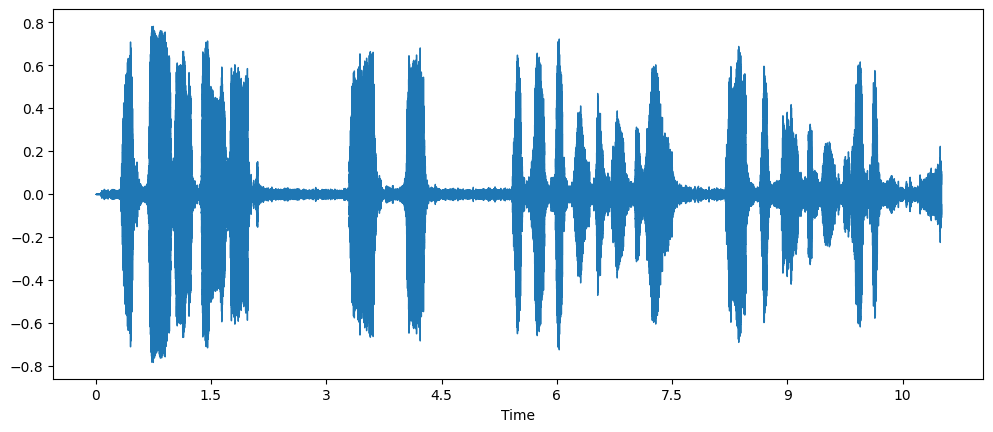

In [15]:
plt.figure().set_figwidth(12)
librosa.display.waveshow(y=data, sr=sampling_rate)

# Mel spectrogram


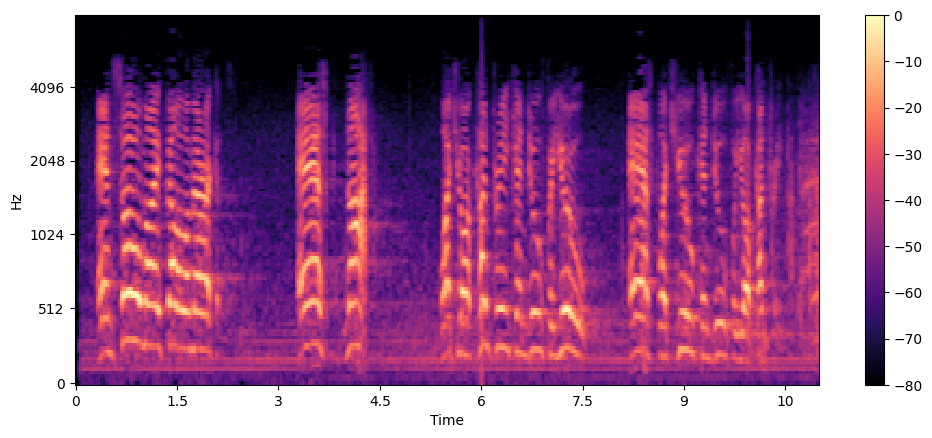

In [17]:
# n_mels stands for the number of mel bands to generate. The mel bands define a set of frequency ranges 
# that divide the spectrum into perceptually meaningful components, using a set of filters whose shape 
# and spacing are chosen to mimic the way the human ear responds to different frequencies. 
# Common values for n_mels are 40 or 80. fmax indicates the highest frequency (in Hz) we care about.
S = librosa.feature.melspectrogram(y=data, sr=sampling_rate, n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_dB, x_axis="time", y_axis="mel", sr=sampling_rate, fmax=8000)
plt.colorbar()

---
# Audio Spectogram Transformer (AST)

## AST Preprocessor

In [18]:
feature_extractor = ASTFeatureExtractor()

In [22]:
# Preprocess the audio data into AST model inputs
inputs = feature_extractor(data, sampling_rate=sampling_rate, padding="max_length", return_tensors="pt")
input_values = inputs.input_values
print(input_values.shape)

torch.Size([1, 1024, 128])


## AST Model

In [27]:
model = AutoModelForAudioClassification.from_pretrained("MIT/ast-finetuned-audioset-10-10-0.4593")     

## Inference

In [29]:
with torch.no_grad():
  outputs = model(input_values)

predicted_class_idx = outputs.logits.argmax(-1).item()
print("Predicted class:", model.config.id2label[predicted_class_idx])

Predicted class: Speech
